In [0]:
import tensorflow as tf
print(tf.__version__)
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

1.15.0


In [0]:
mnist= tf.keras.datasets.fashion_mnist

In [0]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [0]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])
print(train_images[0])
print(train_labels[0])

NameError: ignored

In [0]:
train_images=train_images/255.0
test_images=test_images/255.0
callbacks=myCallback()

In [0]:
model= tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128, activation= 'relu'),
                                   tf.keras.layers.Dense(10, activation= 'softmax')])

In [0]:
model.compile(optimizer= tf.train.AdamOptimizer(),
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=10,callbacks=[callbacks])

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.4980 - acc: 0.8235
Epoch 2/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.3738 - acc: 0.8641
Epoch 3/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3359 - acc: 0.8782
Epoch 4/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3122 - acc: 0.8850
Epoch 5/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2939 - acc: 0.8926
Epoch 6/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.2778 - acc: 0.8974
Epoch 7/10
59680/60000 [============================>.] - ETA: 0s - loss: 0.2672 - acc: 0.9005
Reached 90% accuracy so cancelling training!
60000/60000 [==============================] - 4s 75us/sample - loss: 0.2669 - acc: 0.9006


In [0]:
model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 0s 39us/sample - loss: 0.3450 - acc: 0.8782


[0.3449503403902054, 0.8782]

In [0]:
classifications = model.predict(test_images)
print(classifications[0])
print(classifications[0].tolist().index(max(classifications[0])))

[1.0433976e-08 5.4032658e-09 1.5025558e-08 1.1789775e-09 3.7886881e-08
 2.8619340e-03 2.2163353e-07 1.7658291e-02 6.2223427e-07 9.7947890e-01]
9


### Using **Convolutions** and **Pooling**

In [0]:
import tensorflow as tf
print(tf.__version__)
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.98):
      print("\nReached 98% accuracy so cancelling training!")
      self.model.stop_training = True

1.15.0


In [0]:
mnist= tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

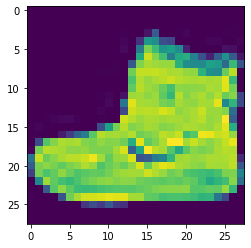

In [0]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])
print(train_images[0])
print(train_labels[0])

In [0]:
train_images=train_images.reshape(60000, 28, 28, 1)
train_images=train_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
callbacks=myCallback()

In [0]:
model= tf.keras.models.Sequential([tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
                                   tf.keras.layers.MaxPooling2D(2, 2),
                                   tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128, activation= 'relu'),
                                   tf.keras.layers.Dense(10, activation= 'softmax')])

In [0]:
model.compile(optimizer= tf.train.AdamOptimizer(),
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=20,callbacks=[callbacks])

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 93us/sample - loss: 0.4439 - acc: 0.8378
Epoch 2/20
60000/60000 [==============================] - 6s 93us/sample - loss: 0.3004 - acc: 0.8894
Epoch 3/20
60000/60000 [==============================] - 6s 92us/sample - loss: 0.2528 - acc: 0.9071
Epoch 4/20
60000/60000 [==============================] - 6s 92us/sample - loss: 0.2192 - acc: 0.9184
Epoch 5/20
60000/60000 [==============================] - 6s 93us/sample - loss: 0.1944 - acc: 0.9273
Epoch 6/20
60000/60000 [==============================] - 6s 93us/sample - loss: 0.1685 - acc: 0.9362
Epoch 7/20
60000/60000 [==============================] - 6s 93us/sample - loss: 0.1489 - acc: 0.9443
Epoch 8/20
60000/60000 [==============================] - 6s 94us/sample - loss: 0.1312 - acc: 0.9503
Epoch 9/20
60000/60000 [==============================] - 6s 93us/sample - loss: 0.1146 - acc: 0.9570
Epoch 10/20
60000/60000 [==============================] - 

In [0]:
model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 1s 56us/sample - loss: 0.4745 - acc: 0.9039


[0.4745210424512625, 0.9039]

In [0]:
classifications = model.predict(test_images)
print(classifications[0])
print(classifications[0].tolist().index(max(classifications[0])))

[3.7695395e-17 8.5756733e-15 8.9037318e-14 2.6195767e-15 4.4139655e-19
 2.5816105e-12 7.5747314e-16 1.2316181e-10 4.4571011e-16 1.0000000e+00]
9
